In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

np.random.seed(69)

sns.set_theme(style='whitegrid')
%matplotlib inline

In [5]:
df = pd.read_csv("wrds3.csv", low_memory = False)
#wrds1.csv has only NYSE stocks
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="coerce")
df["SICCD"] = pd.to_numeric(df["SICCD"], errors="coerce").astype("Int64")
df.head()

,PERMNO,date,SHRCD,EXCHCD,SICCD,TICKER,COMNAM,PRC,VOL,SHROUT,CFACPR,CFACSHR,NUMTRD
0,10001,2000-01-03,11,3,4920,EWST,ENERGY WEST INC,8.5625,1721.0,2450.0,1.5,1.5,2.0
1,10001,2000-01-04,11,3,4920,EWST,ENERGY WEST INC,8.4375,1080.0,2450.0,1.5,1.5,2.0
2,10001,2000-01-05,11,3,4920,EWST,ENERGY WEST INC,8.5625,1711.0,2450.0,1.5,1.5,5.0
3,10001,2000-01-06,11,3,4920,EWST,ENERGY WEST INC,8.5000,580.0,2450.0,1.5,1.5,2.0
4,10001,2000-01-07,11,3,4920,EWST,ENERGY WEST INC,8.4375,1406.0,2450.0,1.5,1.5,4.0


In [6]:
snp_volatility = pd.read_csv("s&p500_vix.csv")
snp_volatility.rename(columns={'Date': "date"}, inplace=True)
snp_volatility['date'] = pd.to_datetime(snp_volatility['date'])

def get_halfyear_period(date):
    year = date.year
    if date.month <= 6:
        return f"{year}H1"
    else:
        return f"{year}H2"

snp_volatility['period'] = snp_volatility['date'].apply(get_halfyear_period)

# Compute mean VIX per period
vix_by_period = snp_volatility.groupby('period')['vix'].mean()
vix_by_period.head()

period
2000H1    24.037143
2000H2    22.592857
2001H1    24.817920
2001H2    26.696585
2002H1    21.506532
Name: vix, dtype: float64

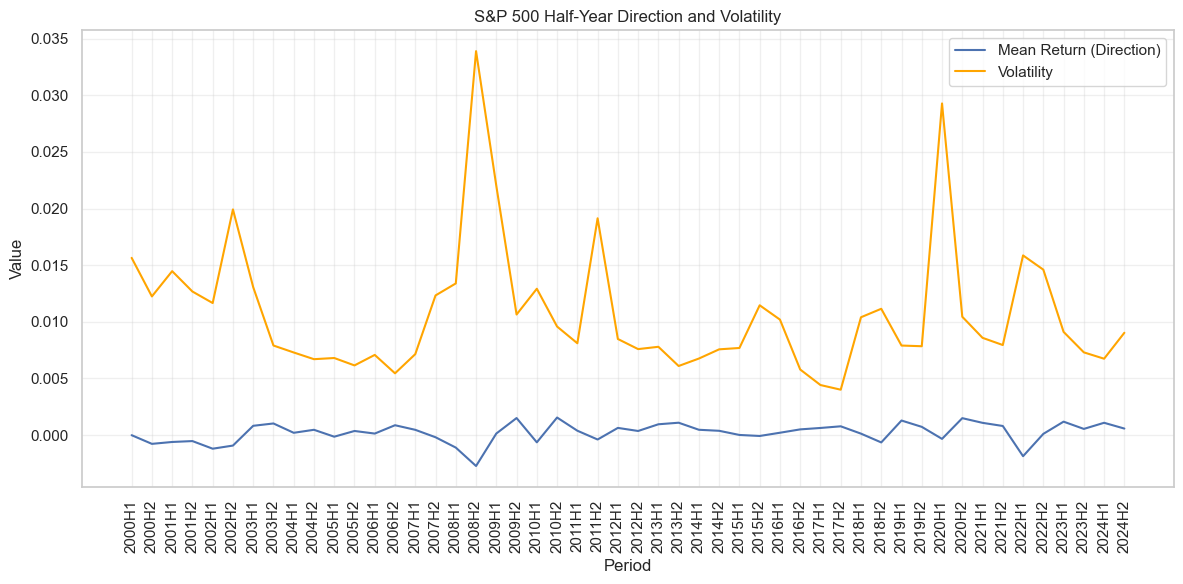

In [7]:
snp = pd.read_csv("wrds_s&p.csv")
snp.rename(columns={"caldt": "date", "spindx": "index"}, inplace=True)
snp["date"] = pd.to_datetime(snp["date"], errors="coerce")
snp["index"] = pd.to_numeric(snp["index"], errors="coerce")

snp["half"] = np.where(snp["date"].dt.month <= 6, "H1", "H2")
snp["period"] = snp["date"].dt.year.astype(str) + snp["half"]

snp = snp.sort_values("date")
snp["log_ret"] = np.log(snp["index"] / snp["index"].shift(1))

snp = snp.replace([np.inf, -np.inf], np.nan).dropna(subset=["log_ret"])

snp_period = (
    snp.groupby("period")["log_ret"]
    .agg(direction="mean", volatility="std")
    .reset_index()
)

snp_period = snp_period.sort_values("period")

plt.figure(figsize=(12,6))
plt.plot(snp_period["period"], snp_period["direction"], label="Mean Return (Direction)")
plt.plot(snp_period["period"], snp_period["volatility"], label="Volatility", color='orange')
plt.xticks(rotation=90)
plt.xlabel("Period")
plt.ylabel("Value")
plt.title("S&P 500 Half-Year Direction and Volatility")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
print(df['EXCHCD'].unique())
print(df['SHRCD'].unique())

[3 1]
[11 10]


In [9]:
# df.drop(["NWPERM"], axis=1, inplace=True)
df["PRC"] = df["PRC"].abs()

In [10]:
df.head()

,PERMNO,date,SHRCD,EXCHCD,SICCD,TICKER,COMNAM,PRC,VOL,SHROUT,CFACPR,CFACSHR,NUMTRD
0,10001,2000-01-03,11,3,4920,EWST,ENERGY WEST INC,8.5625,1721.0,2450.0,1.5,1.5,2.0
1,10001,2000-01-04,11,3,4920,EWST,ENERGY WEST INC,8.4375,1080.0,2450.0,1.5,1.5,2.0
2,10001,2000-01-05,11,3,4920,EWST,ENERGY WEST INC,8.5625,1711.0,2450.0,1.5,1.5,5.0
3,10001,2000-01-06,11,3,4920,EWST,ENERGY WEST INC,8.5000,580.0,2450.0,1.5,1.5,2.0
4,10001,2000-01-07,11,3,4920,EWST,ENERGY WEST INC,8.4375,1406.0,2450.0,1.5,1.5,4.0


In [11]:
len(df["SICCD"].unique())

1135

In [12]:
tickers = [str(i) for i in df['TICKER'].unique()]
tickers.sort()
print(len(tickers))
print("LEH" in tickers)

12996
True


In [13]:
lehman_df = df[df['COMNAM'].str.contains(r'LEHMAN BRO', regex=True, case=False, na=False)]
print(lehman_df.head())

          PERMNO       date  SHRCD  EXCHCD  SICCD TICKER  \
14109084   80599 2000-01-03     11       1   6211    LEH   
14109085   80599 2000-01-04     11       1   6211    LEH   
14109086   80599 2000-01-05     11       1   6211    LEH   
14109087   80599 2000-01-06     11       1   6211    LEH   
14109088   80599 2000-01-07     11       1   6211    LEH   

                                COMNAM      PRC        VOL    SHROUT  CFACPR  \
14109084  LEHMAN BROTHERS HOLDINGS INC  79.0625   957900.0  120014.0     4.0   
14109085  LEHMAN BROTHERS HOLDINGS INC  74.3750  1771699.0  120014.0     4.0   
14109086  LEHMAN BROTHERS HOLDINGS INC  69.9375  2038799.0  120014.0     4.0   
14109087  LEHMAN BROTHERS HOLDINGS INC  72.8750  1992699.0  120014.0     4.0   
14109088  LEHMAN BROTHERS HOLDINGS INC  70.9375  1285199.0  120014.0     4.0   

          CFACSHR  NUMTRD  
14109084      4.0     NaN  
14109085      4.0     NaN  
14109086      4.0     NaN  
14109087      4.0     NaN  
14109088      4.0 

In [14]:
price_data = df[["PERMNO", "date", "TICKER", "COMNAM", "NUMTRD"]].copy()
price_data["price"] = abs(df["PRC"]) / df["CFACPR"]
price_data["market_cap"] = (df["SHROUT"] * df["CFACSHR"]) * price_data["price"] * 1000
price_data["vol"] = df["VOL"] * df["CFACSHR"]
# the number is different from the exact number but for the study we need relative numbers
price_data["sic2"] = df["SICCD"] // 100
price_data['half'] = np.where(price_data['date'].dt.month <= 6, 'H1', 'H2')
price_data['period'] = price_data['date'].dt.year.astype(str) + price_data['half']
price_data.columns = [i.lower() for i in price_data.columns]
price_data.drop(["half"], axis=1, inplace=True)
price_data = price_data.sort_values(['ticker', 'date'])
price_data['ret'] = (
    np.log(price_data['price'] / price_data.groupby('ticker')['price'].shift(1))
)
price_data = price_data.sort_values(['date', 'ticker'])
# Remove rows where ret is NaN or infinite
price_data = price_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['ret'])

# numtrd: number of trades is useful to filter thinly traded stocks that might cloud covariance matrices
# vol: filters out tiny illiquid stocks that cannot meaningfully contribute to a portfolio

price_data.head()

# take care of the divide by zero in log warning

/Users/sagnik/Work and Research/Projects/spectral-analysis-market-information-diffusion/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,permno,date,ticker,comnam,numtrd,price,market_cap,vol,sic2,period,ret
10175637,69163,2000-01-03,ACV,ALBERTO CULVER CO,NaN,21.125000,4.800445e+08,6300.0,28,2000H1,0.544513
13752385,80169,2000-01-03,AGM,FEDERAL AGRICULTURAL MORT CORP,NaN,19.312500,1.800118e+08,4100.0,61,2000H1,0.188164
12368168,77881,2000-01-03,BDG,BANDAG INC,NaN,21.437500,2.311391e+08,3200.0,30,2000H1,-0.163684
7082296,29946,2000-01-03,BF,BROWN FORMAN CORP,NaN,6.146667,2.277455e+09,1075312.5,20,2000H1,0.075368
15782627,83443,2000-01-03,BRK,BERKSHIRE HATHAWAY INC DEL,NaN,35.300000,9.428630e+09,873500.0,63,2000H1,-7.347563


In [15]:
company_universe = price_data["ticker"].unique()
print(company_universe)
print(len(company_universe))

['ACV' 'AGM' 'BDG' ... 'NPKI' 'HIT' 'NEUP']
12974


In [16]:
random_ticker = random.choice(company_universe)
print(random_ticker)
random_ticker_df = price_data[price_data["ticker"] == random_ticker]
random_ticker_df.tail()

ECBK


,permno,date,ticker,comnam,numtrd,price,market_cap,vol,sic2,period,ret
6351574,23223,2024-12-24,ECBK,ECB BANCORP INC,23.0,15.10,137681800.0,399.0,99,2024H2,-0.001324
6351575,23223,2024-12-26,ECBK,ECB BANCORP INC,31.0,14.92,136040560.0,895.0,99,2024H2,-0.011992
6351576,23223,2024-12-27,ECBK,ECB BANCORP INC,231.0,14.90,135858200.0,3709.0,99,2024H2,-0.001341
6351577,23223,2024-12-30,ECBK,ECB BANCORP INC,155.0,14.78,134764040.0,2910.0,99,2024H2,-0.008086
6351578,23223,2024-12-31,ECBK,ECB BANCORP INC,134.0,14.84,135311120.0,2109.0,99,2024H2,0.004051


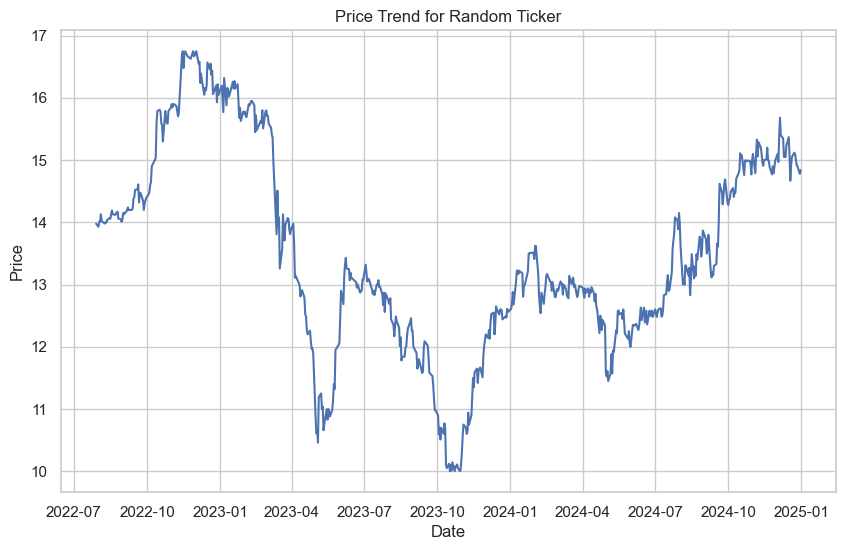

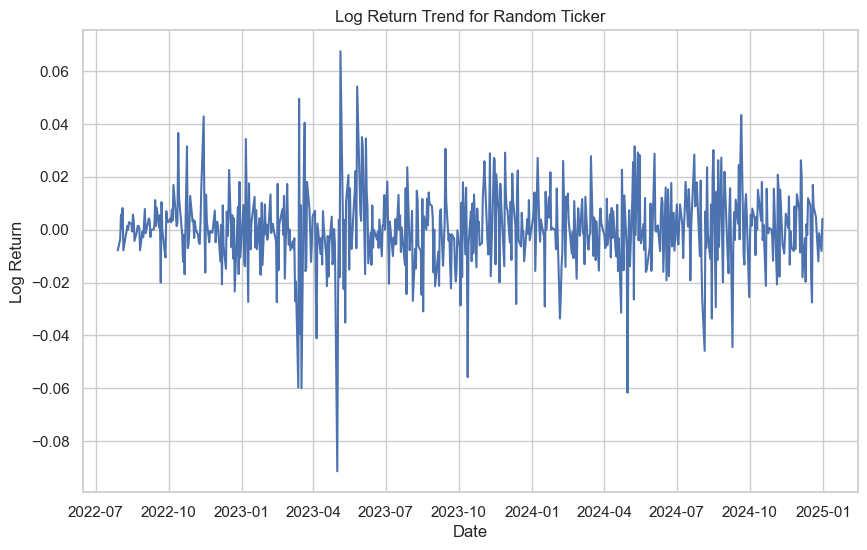

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(data=random_ticker_df, x="date", y="price")
plt.title("Price Trend for Random Ticker")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=random_ticker_df, x="date", y="ret")
plt.title("Log Return Trend for Random Ticker")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

In [18]:
# listing_info = pd.DataFrame()
price_data.head()

,permno,date,ticker,comnam,numtrd,price,market_cap,vol,sic2,period,ret
10175637,69163,2000-01-03,ACV,ALBERTO CULVER CO,NaN,21.125000,4.800445e+08,6300.0,28,2000H1,0.544513
13752385,80169,2000-01-03,AGM,FEDERAL AGRICULTURAL MORT CORP,NaN,19.312500,1.800118e+08,4100.0,61,2000H1,0.188164
12368168,77881,2000-01-03,BDG,BANDAG INC,NaN,21.437500,2.311391e+08,3200.0,30,2000H1,-0.163684
7082296,29946,2000-01-03,BF,BROWN FORMAN CORP,NaN,6.146667,2.277455e+09,1075312.5,20,2000H1,0.075368
15782627,83443,2000-01-03,BRK,BERKSHIRE HATHAWAY INC DEL,NaN,35.300000,9.428630e+09,873500.0,63,2000H1,-7.347563


In [19]:
# First and last observation per firm
summary = price_data.groupby("permno")["date"].agg(first_obs="min", last_obs="max").reset_index()

# Define strict boundaries
start_cutoff = pd.Timestamp("2000-01-03")
end_cutoff   = pd.Timestamp("2024-12-31")

# Extract listing/delisting years only for firms strictly inside the boundaries
summary["listing_year"] = summary.loc[summary["first_obs"] > start_cutoff, "first_obs"].dt.year
summary["delisting_year"] = summary.loc[summary["last_obs"] < end_cutoff, "last_obs"].dt.year

# Count listings and delistings per year
years = range(2000, 2025)
listings = summary["listing_year"].value_counts().reindex(years, fill_value=0)
delistings = summary["delisting_year"].value_counts().reindex(years, fill_value=0)

# Combine into a single dataframe
listing_info = pd.DataFrame({"listings": listings, "delistings": delistings})
listing_info["net_change"] = listing_info["listings"] - listing_info["delistings"]
listing_info.index.name = "year"

print(f"Total listings over period: {listing_info["listings"].sum()}")
print(f"Total delistings over period: {listing_info["delistings"].sum()}")
print(f"Net listing change over period: {listing_info["net_change"].sum()}")

listing_info
# the numbers here might be wrong -- issue might be sorting

Total listings over period: 11976
Total delistings over period: 8364
Net listing change over period: 3612


,listings,delistings,net_change
year,,,
2000,6597,831,5766
2001,167,800,-633
2002,150,521,-371
2003,147,438,-291
2004,261,330,-69
2005,258,331,-73
2006,269,315,-46
2007,269,385,-116
2008,145,328,-183


In [20]:
# total_days = price_data["date"].nunique()

# threshold = 0.75
# required_representation = threshold * total_days

# coverage = (
#     price_data.groupby('permno')['date']
#     .nunique()
#     .reset_index(name = "days_present")
# )
# coverage["relative_representation"] = coverage["days_present"] / total_days

# print(f"Firms with required representation: {len(coverage.query("relative_representation >= @threshold"))}")

# coverage.head()

# # not a good way to do it

In [21]:
# companies like this have very low representation in a given time period which might skew correlation calculations
df[df["TICKER"] == "GLGC"].tail()
# a rule is therefore required to filter such companies with very low representation
# a good rule is to require at least 75% presence in the time period being considered

,PERMNO,date,SHRCD,EXCHCD,SICCD,TICKER,COMNAM,PRC,VOL,SHROUT,CFACPR,CFACSHR,NUMTRD
17542016,85549,2007-12-26,11,3,8730,GLGC,GENE LOGIC INC,0.8300,67711.0,32173.0,0.2,0.2,141.0
17542017,85549,2007-12-27,11,3,8730,GLGC,GENE LOGIC INC,0.7600,389753.0,32173.0,0.2,0.2,446.0
17542018,85549,2007-12-28,11,3,8730,GLGC,GENE LOGIC INC,0.7901,607871.0,32173.0,0.2,0.2,402.0
17542019,85549,2007-12-31,11,3,8730,GLGC,GENE LOGIC INC,0.8100,312240.0,32243.0,0.2,0.2,352.0
17542020,85549,2008-01-02,11,3,8730,GLGC,GENE LOGIC INC,0.8100,166924.0,32243.0,0.2,0.2,216.0


In [22]:
def sector(sic):
    if 1 <= sic <= 9:
        return 'Agri/Fish/Forestry'
    elif 10 <= sic <= 14:
        return 'Mining'
    elif 15 <= sic <= 17:
        return 'Construction'
    elif 20 <= sic <= 39:
        return 'Manufacturing'
    elif 40 <= sic <= 49:
        return 'Transp/Comm/Utilities'
    elif 50 <= sic <= 51:
        return 'Wholesale Trade'
    elif 52 <= sic <= 59:
        return 'Retail Trade'
    elif 60 <= sic <= 67:
        return 'Finance/Insurance/RealEstate'
    elif 70 <= sic <= 89:
        return 'Services'
    elif 91 <= sic <= 99:
        return 'Public Admin / Other'
    else:
        return 'Unknown'

price_data['sector'] = price_data['sic2'].apply(lambda x: sector(int(x)) if pd.notnull(x) else 'Unknown')

In [23]:
avg_size  = price_data.groupby('sector')['market_cap'].mean()
total_size = price_data.groupby('sector')['market_cap'].sum()

weights = pd.DataFrame({
    'avg_firm_weight': avg_size / avg_size.sum(),
    'total_market_weight': total_size / total_size.sum()
}).sort_values('total_market_weight', ascending=False)

weights

# if we are sampling n firms at any point, we would want that to look as close to the actual market as possible
# hence weighting by "total market weight" would be a better way than by "average firm size weight"

,avg_firm_weight,total_market_weight
sector,,
Manufacturing,0.139545,0.393445
Services,0.139959,0.194411
Finance/Insurance/RealEstate,0.103499,0.160122
Transp/Comm/Utilities,0.153429,0.093763
Retail Trade,0.146395,0.069619
Public Admin / Other,0.040835,0.038011
Mining,0.112895,0.029554
Wholesale Trade,0.059013,0.015657
Construction,0.051291,0.004516


In [50]:
sector_weights = (
    price_data
    .groupby(['period', 'sector'])['market_cap']
    .sum()
    .reset_index(name='market_cap')
)

sector_weights['weight'] = sector_weights.groupby('period')['market_cap'].transform(lambda x: x / x.sum())

sector_weights = sector_weights[['period', 'sector', 'weight']]

sector_weights.head(15)


,period,sector,weight
0,2000H1,Agri/Fish/Forestry,0.000175
1,2000H1,Construction,0.001440
2,2000H1,Finance/Insurance/RealEstate,0.146419
3,2000H1,Manufacturing,0.470342
4,2000H1,Mining,0.011543
5,2000H1,Public Admin / Other,0.000005
6,2000H1,Retail Trade,0.059895
7,2000H1,Services,0.169382
8,2000H1,Transp/Comm/Utilities,0.128308
9,2000H1,Wholesale Trade,0.012490


/Users/sagnik/Work and Research/Projects/spectral-analysis-market-information-diffusion/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sagnik/Work and Research/Projects/spectral-analysis-market-information-diffusion/env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


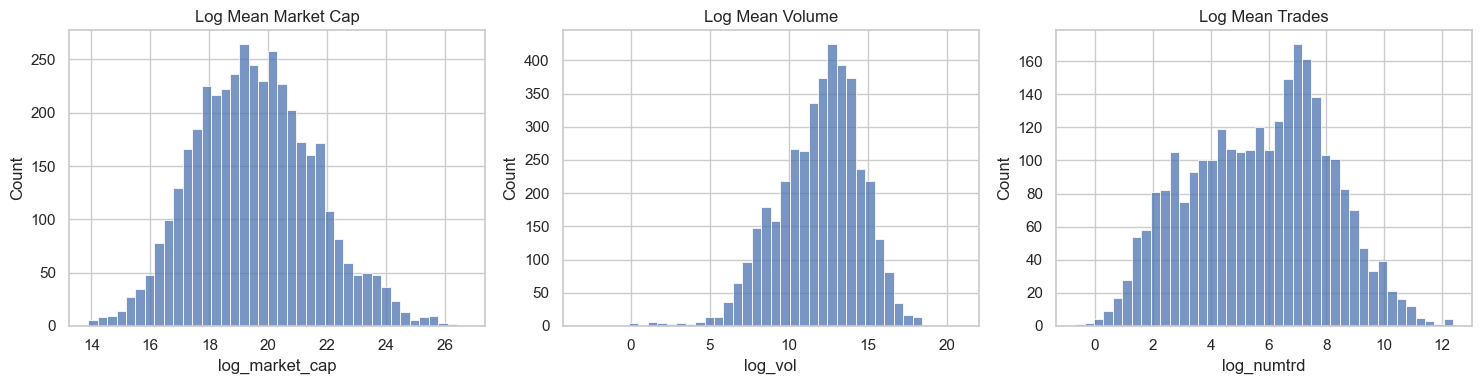

In [25]:
period = "2008H2"

period_data = price_data[price_data['period'] == period]

agg = period_data.groupby('ticker').agg({
    'market_cap': 'mean',    # mean market cap
    'vol': 'mean',           # mean volume 
    'numtrd': 'mean'         # mean number of trades
}).reset_index()

agg['log_market_cap'] = np.log(agg['market_cap'])
agg['log_vol'] = np.log(agg['vol'])
agg['log_numtrd'] = np.log(agg['numtrd'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(agg["log_market_cap"], bins=40, ax=axes[0])
axes[0].set_title("Log Mean Market Cap")

sns.histplot(agg["log_vol"], bins=40, ax=axes[1])
axes[1].set_title("Log Mean Volume")

sns.histplot(agg["log_numtrd"], bins=40, ax=axes[2])
axes[2].set_title("Log Mean Trades")

plt.tight_layout()
plt.show()

Adding random tickers to meet the quota.
Adding random tickers to meet the quota.
['ICBC', 'RSLN', 'CPSS', 'RCBK', 'FMER', 'UNIT', 'GLDB', 'UCBH', 'QCSB', 'RSFC']


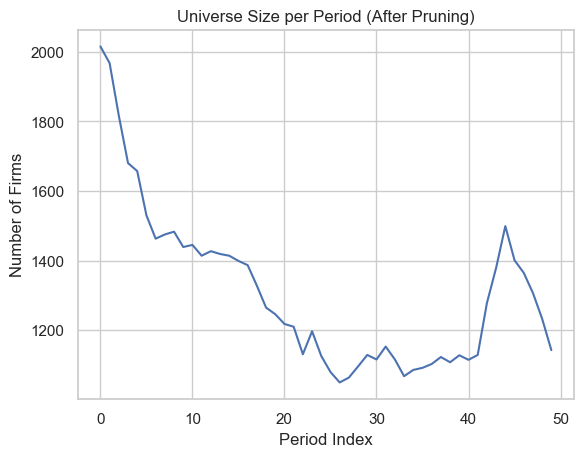

In [54]:
n_total = 250 # samples per period
samples_by_period = {}
universe_size_per_period = []

for period in sector_weights['period'].unique():
    period_weights = sector_weights[sector_weights['period'] == period]

    period_cutoff_data = (
        price_data[price_data['period'] == period]
        .groupby(['ticker', 'sector'])
        .agg({
            'vol': 'mean',
            'numtrd': 'mean'
        })
        .reset_index()
    )

    # period-specific cutoffs
    vol_cutoff = period_cutoff_data['vol'].quantile(0.25)
    trade_cutoff = period_cutoff_data['numtrd'].quantile(0.10)

    # apply pruning
    period_data = price_data[price_data["period"] == period]
    period_data = period_data[
        (period_data['vol'] > vol_cutoff) &
        (period_data['numtrd'] > trade_cutoff)
    ]
    
    # coverage check
    period_size = period_data["date"].nunique()
    required_representation = 0.75 * period_size
    coverage = (
        period_data.groupby('ticker')['date']
        .nunique()
        .reset_index(name = "days_present")
    )
    valid_tickers = coverage[coverage["days_present"] >= required_representation]["ticker"]
    period_data = period_data[period_data["ticker"].isin(valid_tickers)]

    universe_size_per_period.append(period_data["ticker"].nunique())

    # proportional allocation
    sector_n_raw = period_weights['weight'] * n_total
    sector_n_floor = sector_n_raw.astype(int)
    leftover = n_total - sector_n_floor.sum()
    remainders = sector_n_raw - sector_n_floor
    if leftover > 0:
        extra_idx = remainders.nlargest(leftover).index
        sector_n_floor.loc[extra_idx] += 1

    sampled_tickers = []
    for idx, row in period_weights.iterrows():
        sector = row['sector']
        n_sample = sector_n_floor.loc[idx]
        sector_firms = period_data[period_data['sector'] == sector]['ticker'].unique()
        n_sample = min(len(sector_firms), n_sample)
        if n_sample > len(sector_firms):
            print(f"Warning: Not enough firms in sector {sector} for period {period}")
        if n_sample > 0:
            sampled = np.random.choice(sector_firms, size=n_sample, replace=False)
            if len(sampled) < n_sample:
                print(f"Warning: Sampled fewer firms than expected in sector {sector} for period {period}")
            sampled_tickers.extend(sampled)

    if len(sampled_tickers) < n_total:
        print(f"Warning: Total sampled tickers {len(sampled_tickers)} less than n_total {n_total} for period {period}")
        print("Adding random tickers to meet the quota.")
        additional_needed = n_total - len(sampled_tickers)
        available_tickers = list(set(period_data['ticker'].unique()) - set(sampled_tickers))
        # Can sample tickers preferentially according to sector weights here if needed
        if len(available_tickers) < additional_needed:
            print(f"Not enough available tickers to meet the quota for period {period}.")
            additional_needed = len(available_tickers)
        additional_samples = np.random.choice(available_tickers, size=additional_needed, replace=False)
        sampled_tickers.extend(additional_samples)
    

    sampled_tickers = sampled_tickers[:n_total]  # ensure exactly n_total samples
    if len(sampled_tickers) != n_total:
        print(f"Error: After adjustment, sampled tickers count {len(sampled_tickers)} still not equal to n_total {n_total} for period {period}")
    samples_by_period[period] = sampled_tickers

print(samples_by_period['2000H1'][:10])   # first few tickers from 2000H1
sns.lineplot(x=range(len(universe_size_per_period)), y=universe_size_per_period)
plt.title("Universe Size per Period (After Pruning)")
plt.xlabel("Period Index")
plt.ylabel("Number of Firms")
plt.show()

# Early sharp drop (2000 – 2003)	
# That’s the dot‑com collapse + “penny stock flush”. Thousands of NASDAQ issues were delisted or went illiquid. Quantile‑based filters eliminate them, producing the plunge.
# Gradual downward slope (2004 – 2015ish)	
# Real contraction in U.S. listings: mergers, tighter listing standards, post‑SOX delistings, and fewer IPOs. CRSP data show this decline in actual counts too.
# Small uptick around Index ≈ 40 (≈ 2020 – 2022)	
# Post‑COVID / SPAC / IPO‑boom surge. Capturing that wave of new small‑cap and SPAC listings with sufficient trading activity.
# Recent taper	
# Many of those 2021 listings thinned out or merged again.

In [55]:
for period in samples_by_period.keys():
    if len(samples_by_period[period]) != n_total:
        print(f"Period {period} has {len(samples_by_period[period])} samples instead of {n_total}")

for i in universe_size_per_period:
    if i < n_total:
        print("Some periods have universe size less than n_total")
        break

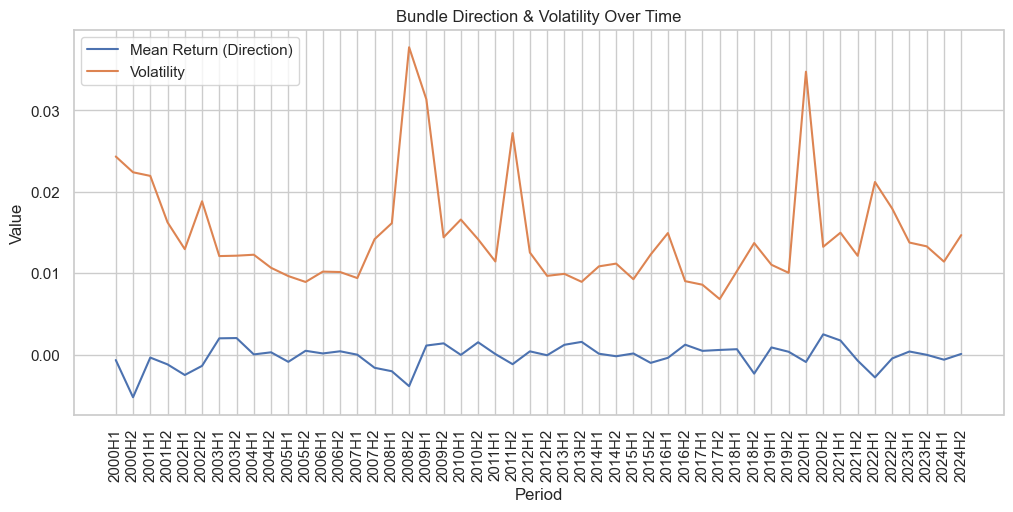

In [56]:
direction_by_period = []
volatility_by_period = []

# other ways to get directionality is a weighted average (not a fan) and PC1
for period, tickers in samples_by_period.items():
    dfp = price_data[(price_data['period'] == period) &
                     (price_data['ticker'].isin(tickers))]
    
    mean_ret = dfp.groupby('date')['ret'].mean()  # average across stocks for each day
    direction_by_period.append(mean_ret.mean())  # mean over the period
    volatility_by_period.append(mean_ret.std())  # strength of moves

periods_sorted = sorted(samples_by_period.keys())
plt.figure(figsize=(12,5))
plt.plot(periods_sorted, direction_by_period, label='Mean Return (Direction)')
plt.plot(periods_sorted, volatility_by_period, label='Volatility')
plt.xticks(rotation=90)
plt.xlabel("Period")
plt.ylabel("Value")
plt.title("Bundle Direction & Volatility Over Time")
plt.legend()
plt.grid(True)
plt.show()

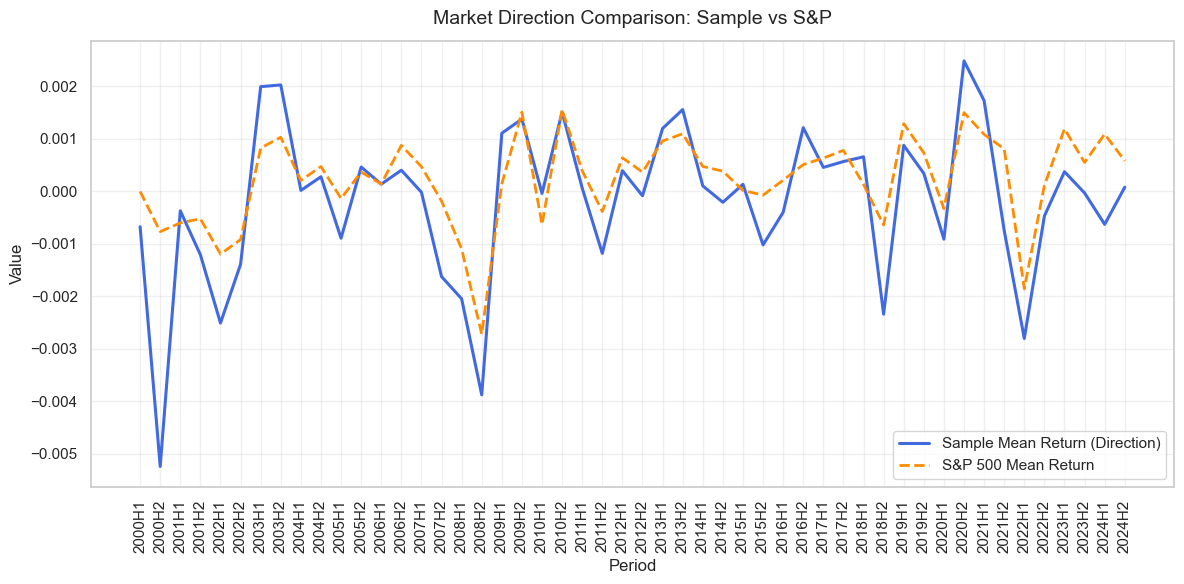

In [57]:
direction_arr = np.array(direction_by_period)
snp_arr = np.array(snp_period["direction"])

plt.figure(figsize=(12,6))
plt.plot(periods_sorted, direction_arr, label='Sample Mean Return (Direction)', color='royalblue', linewidth=2.2)
plt.plot(periods_sorted, snp_arr, label='S&P 500 Mean Return', color='darkorange', linestyle='--', linewidth=2)

plt.xticks(rotation=90)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Market Direction Comparison: Sample vs S&P', fontsize=14, pad=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
from sklearn.covariance import LedoitWolf

corr_by_period = {}
lw = LedoitWolf()

for period, tickers in samples_by_period.items():
    dfp = price_data[(price_data['period'] == period) &
                     (price_data['ticker'].isin(tickers))]

    # aggregate to ensure uniqueness
    dfp_agg = dfp.groupby(['date', 'ticker'])['ret'].mean().reset_index()

    # pivot to wide format
    ret_wide = dfp_agg.pivot(index='date', columns='ticker', values='ret')
    ret_wide = ret_wide.fillna(0)

    X = ret_wide.values
    if X.shape[0] < 2:
        print(f"Skipping {period}, insufficient data")
        continue

    lw.fit(X)
    cov = pd.DataFrame(lw.covariance_, index=ret_wide.columns, columns=ret_wide.columns)
    std = np.sqrt(np.diag(cov))
    corr = cov / np.outer(std, std)
    corr_by_period[period] = pd.DataFrame(corr, index=ret_wide.columns, columns=ret_wide.columns)

In [59]:
corr_by_period["2000H1"].values
# ensure all matrices are of the same dimension

import networkx as nx
G = nx.from_numpy_array(corr_by_period["2008H1"].values)
print(nx.is_connected(G))

components = list(nx.connected_components(G))
for i, comp in enumerate(components):
    print(f"Component {i+1} ({len(comp)} nodes): {comp}")

corr_by_period["2008H1"].iloc[93]

True
Component 1 (250 nodes): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

ticker
ABCB    0.318000
ACAD    0.095062
ACLI    0.267859
ACLS    0.131979
ACTG    0.266233
          ...   
WSFS    0.262185
XNPT    0.181913
ZBRA    0.176435
ZGEN    0.115617
ZIXI    0.123226
Name: GYMB, Length: 250, dtype: float64

{'2000H1': np.float64(0.7726366852500776), '2000H2': np.float64(0.8060913367798529), '2001H1': np.float64(0.820719049631012), '2001H2': np.float64(0.8253511049924919), '2002H1': np.float64(0.8053606013153093), '2002H2': np.float64(0.8479535045534948), '2003H1': np.float64(0.8315716882758076), '2003H2': np.float64(0.8231301075456025), '2004H1': np.float64(0.869408548512193), '2004H2': np.float64(0.8432995617833745), '2005H1': np.float64(0.8361242121331597), '2005H2': np.float64(0.8282627490920476), '2006H1': np.float64(0.8477482632362269), '2006H2': np.float64(0.8542856570771293), '2007H1': np.float64(0.8770664922922349), '2007H2': np.float64(0.8013370549926729), '2008H1': np.float64(0.7985937672735319), '2008H2': np.float64(0.9080554578857042), '2009H1': np.float64(0.9252495328863377), '2009H2': np.float64(0.878986624357154), '2010H1': np.float64(0.9304952779068272), '2010H2': np.float64(0.9214619357378923), '2011H1': np.float64(0.8793270232987952), '2011H2': np.float64(0.9584046181815

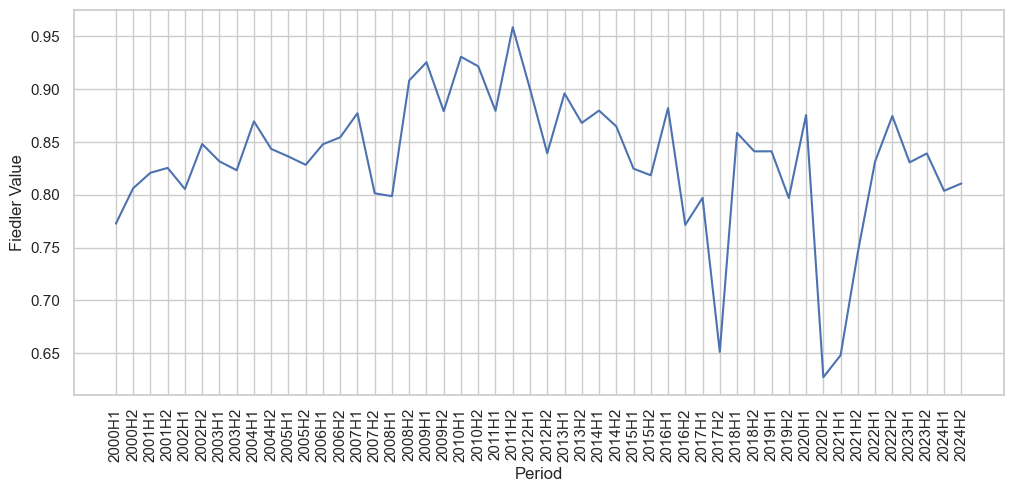

In [60]:
from scipy.sparse import csgraph

fiedler_by_period = {}

for period in sorted(corr_by_period.keys()):
    corr = corr_by_period[period]

    if corr.shape[0] < 2:  # too few tickers
        fiedler_by_period[period] = np.nan
        continue

    # adjacency matrix: transform correlation [-1,1] -> [0,1]
    A = abs(corr.values)
    
    # correlation matrix has 1s on the diagonal which creates self-loops
    np.fill_diagonal(A, 0)
    

    # the thresholding step is both crucial and arbitrary; it helps to reduce noise and improve the stability of the spectral properties
    # but it also removes information, like market disconnectivity before/crisis where stocks move erratically with multiple pairs having low correlations
    # checking if any value is negative
    if np.any(A < 0):
        print(f"Warning: Negative values found in adjacency matrix for period {period}")
    # normalized Laplacian
    L_norm = csgraph.laplacian(A, normed=True)
    
    # eigenvalues
    eigvals = np.linalg.eigvalsh(L_norm)
    
    # Fiedler value (second-smallest)
    fiedler_by_period[period] = eigvals[1]

periods_sorted = sorted(fiedler_by_period.keys())
print(fiedler_by_period)
plt.figure(figsize=(12,5))
plt.plot(periods_sorted, fiedler_by_period.values(), label="Fiedler Value")
plt.xticks(rotation=90)
plt.xlabel("Period")
plt.ylabel("Fiedler Value")
plt.grid(True)
plt.show()

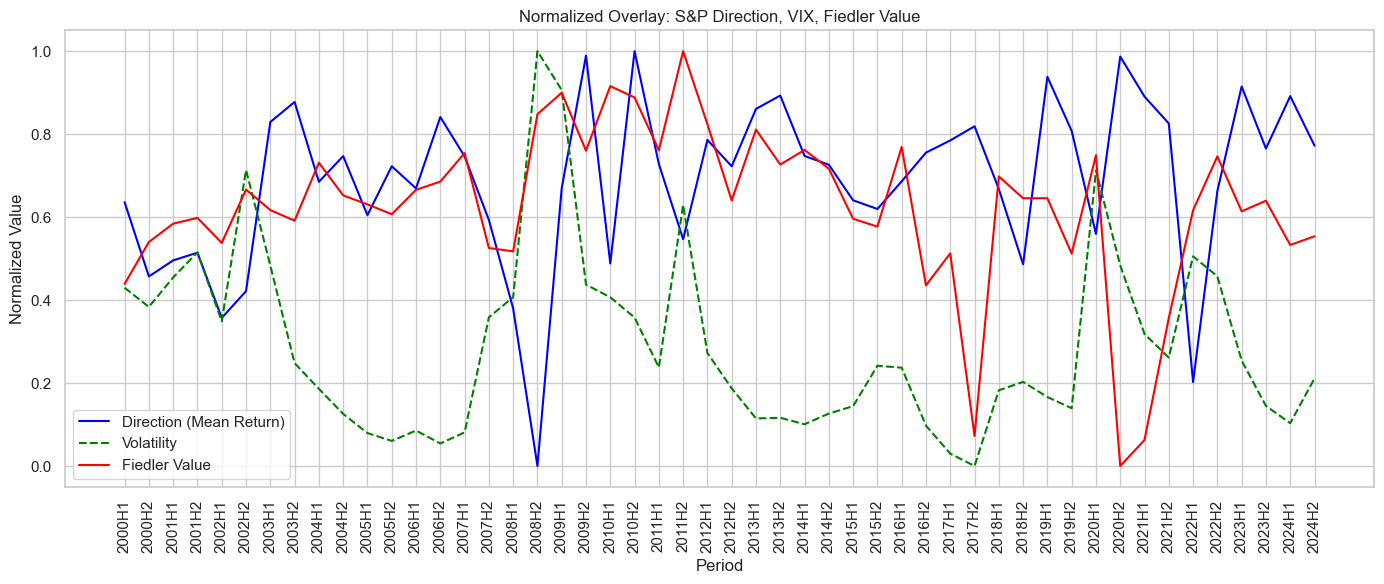

In [61]:
snp_arr = np.array(snp_period["direction"])
vix_by_period_arr = np.array(vix_by_period)
fiedler_arr = np.array(list(fiedler_by_period.values()))

# min-max normalize each series to [0,1]
def normalize(arr):
    return (arr - np.nanmin(arr)) / (np.nanmax(arr) - np.nanmin(arr))

direction_norm = normalize(snp_arr)
volatility_norm = normalize(vix_by_period_arr)
fiedler_norm = normalize(fiedler_arr)

plt.figure(figsize=(14,6))
plt.plot(periods_sorted, direction_norm, label='Direction (Mean Return)', color='blue')
plt.plot(periods_sorted, volatility_norm, label='Volatility', color='green', linestyle='--')
plt.plot(periods_sorted, fiedler_norm, label='Fiedler Value', color='red')

plt.xticks(rotation=90)
plt.xlabel('Period')
plt.ylabel('Normalized Value')
plt.title('Normalized Overlay: S&P Direction, VIX, Fiedler Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

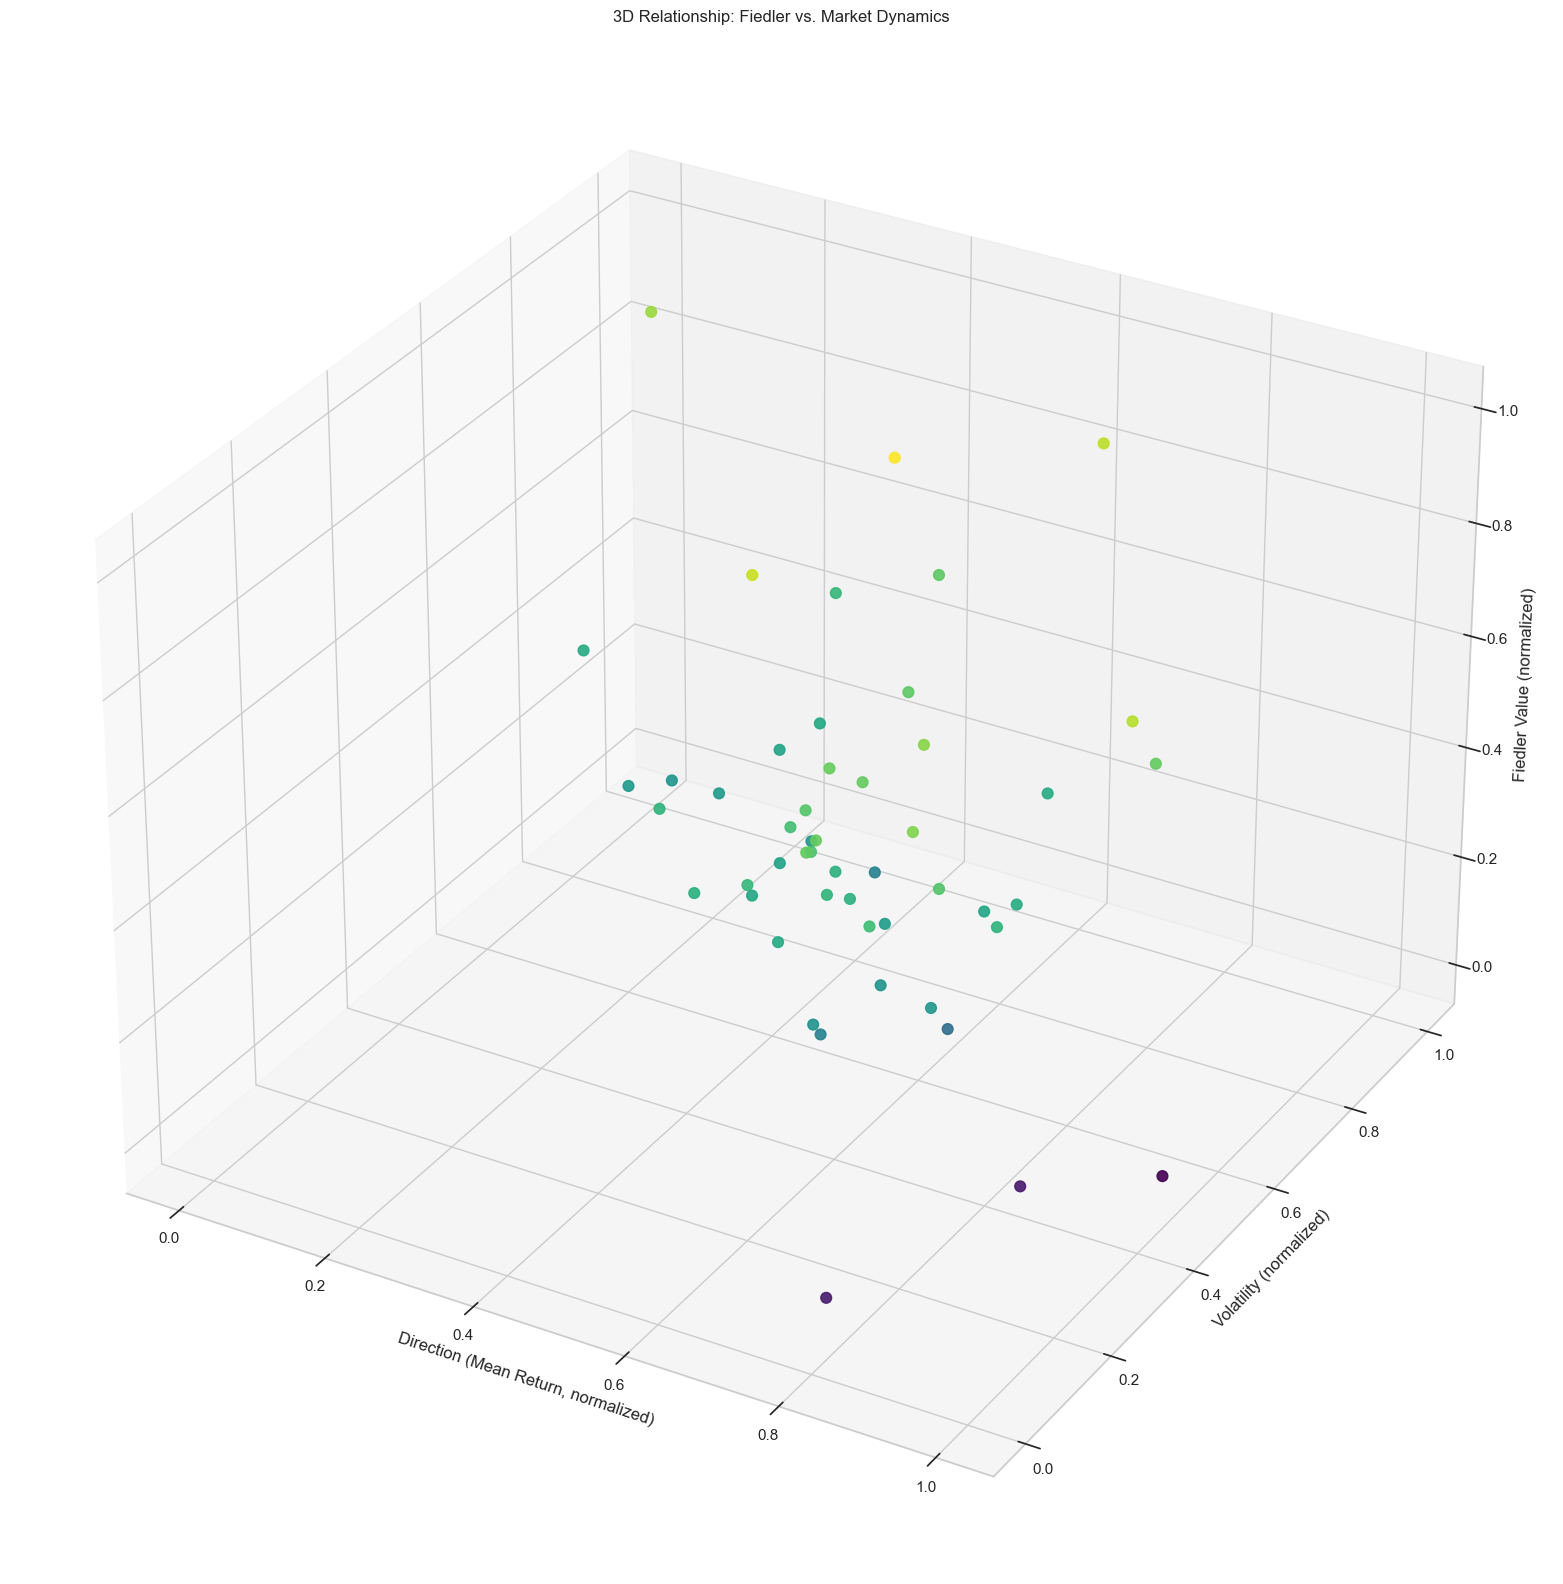

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(direction_norm, volatility_norm, fiedler_norm,
           c=fiedler_norm, cmap='viridis', s=60, alpha=0.9)

ax.set_xlabel("Direction (Mean Return, normalized)")
ax.set_ylabel("Volatility (normalized)")
ax.set_zlabel("Fiedler Value (normalized)")
ax.set_title("3D Relationship: Fiedler vs. Market Dynamics")

plt.tight_layout()
plt.show()

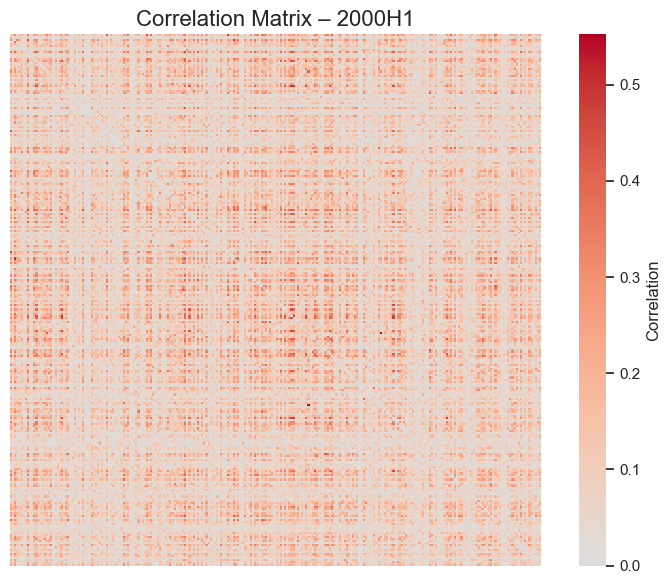

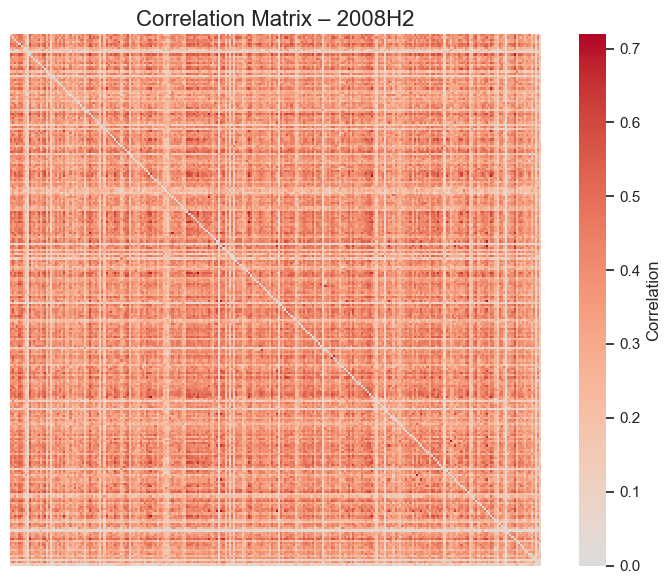

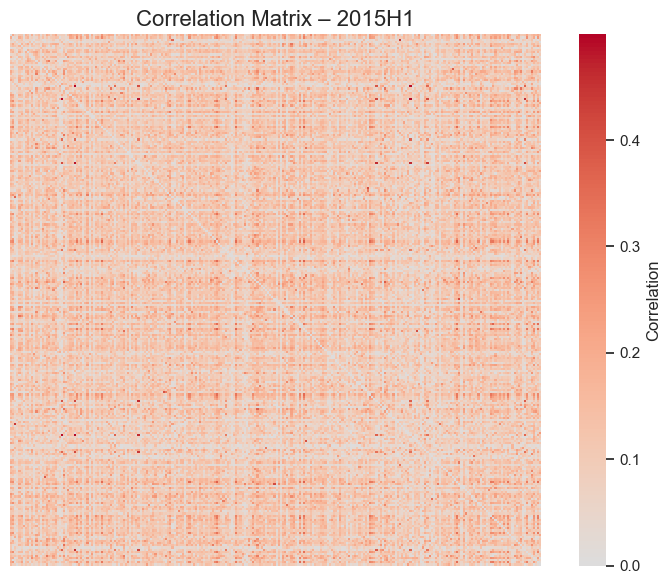

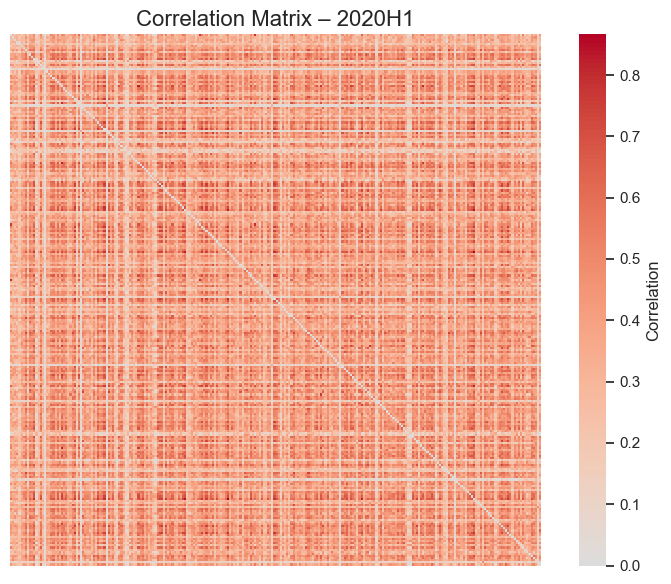

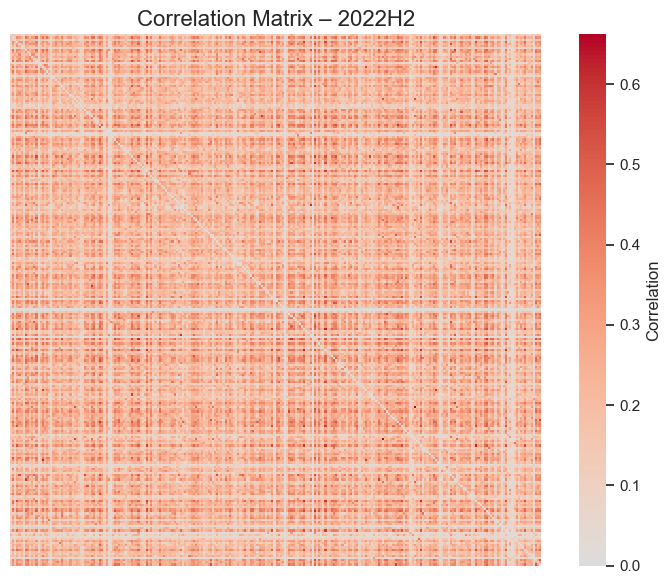

In [63]:
test_range = ["2000H1", "2008H2", "2015H1", "2020H1", "2022H2"]

for period in test_range:
    corr = corr_by_period[period]

    # make sure correlation matrix is numeric only
    A = abs(corr.values)
    
    # correlation matrix has 1s on the diagonal which creates self-loops
    np.fill_diagonal(A, 0)
    # create figure
    plt.figure(figsize=(8, 6))

    # draw the heatmap
    sns.heatmap(
        A,
        cmap="coolwarm",      # red = positive, blue = negative
        center=0,             # center colormap at zero
        cbar_kws={'label': 'Correlation'},
        square=True,
        xticklabels=False,    # hide labels if large
        yticklabels=False
    )

    plt.title(f"Correlation Matrix – {period}", fontsize=16)
    plt.tight_layout()
    plt.show()

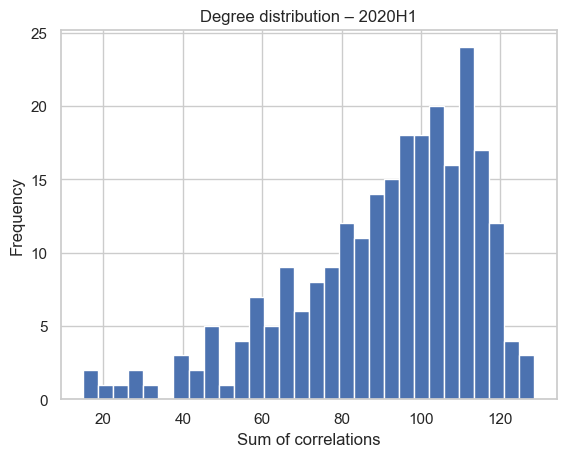

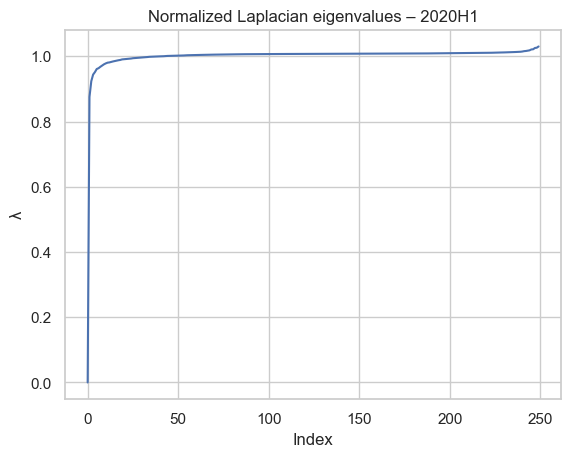

In [64]:
# degree distribution
test_period = "2020H1"
A = np.abs(corr_by_period[test_period].values)
np.fill_diagonal(A, 0)
degrees = A.sum(axis=1)
plt.hist(degrees, bins=30)
plt.title(f"Degree distribution – {test_period}")
plt.xlabel("Sum of correlations")
plt.ylabel("Frequency")
plt.show()

# eigenvalue spectrum
from scipy.sparse.csgraph import laplacian
eigvals = np.linalg.eigvalsh(laplacian(A, normed=True))
plt.plot(sorted(eigvals))
plt.title(f"Normalized Laplacian eigenvalues – {test_period}")
plt.xlabel("Index")
plt.ylabel("λ")
plt.show()

In [65]:
import pickle

with open("samples_by_period.pkl", "wb") as f:
    pickle.dump(samples_by_period, f)
with open("corr_by_period.pkl", "wb") as f:
    pickle.dump(corr_by_period, f)